In [2]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/data_m_times/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 51):
    filename = f'{base_path}docu_small_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

# Initialize arrays to hold the average times for each attack type
ns_times = [None] * 10
multi_times = [None] * 10
stat_times = [None] * 10

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']

ns_times, multi_times, stat_times

Round 1, Attack Type NS Attack: Average Time = 0.0136
Round 10, Attack Type Multi Attack: Average Time = 0.1075
Round 10, Attack Type NS Attack: Average Time = 0.5426
Round 10, Attack Type Statistical Attack: Average Time = 0.0881
Round 2, Attack Type NS Attack: Average Time = 0.0227
Round 3, Attack Type NS Attack: Average Time = 0.0387
Round 4, Attack Type NS Attack: Average Time = 0.0639
Round 5, Attack Type Multi Attack: Average Time = 0.0844
Round 5, Attack Type NS Attack: Average Time = 0.1120
Round 5, Attack Type Statistical Attack: Average Time = 0.0577
Round 6, Attack Type Multi Attack: Average Time = 0.0862
Round 6, Attack Type NS Attack: Average Time = 0.1581
Round 6, Attack Type Statistical Attack: Average Time = 0.0678
Round 7, Attack Type Multi Attack: Average Time = 0.1041
Round 7, Attack Type NS Attack: Average Time = 0.2204
Round 7, Attack Type Statistical Attack: Average Time = 0.0753
Round 8, Attack Type Multi Attack: Average Time = 0.1006
Round 8, Attack Type NS Atta

10


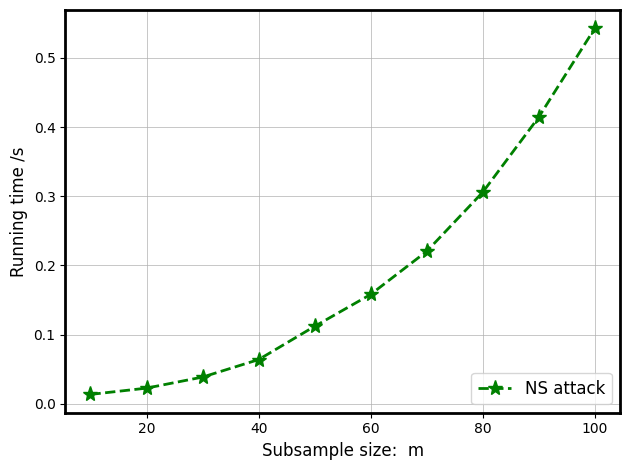

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_values = [i*10+10 for i in range(10)]
ns = ns_times
multi = multi_times
stat = stat_times
# Generate some dummy data for 'multi' and 'stat' since it's not provided

print(len(multi))
marker_size = 11
# Plot lines with the new styles and markers
ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)

#ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
#ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# Add grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax.set_xlabel('Subsample size:  m', fontsize=12)
ax.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
legend = ax.legend(frameon=True, loc='lower right', fontsize=12)
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_ns.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_ns.png', bbox_inches='tight')

plt.show()


In [ ]:
#下面用于求攻击成功率，代码和上面的有区别

In [11]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/data_m_times/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 51):
    filename = f'{base_path}docu_small_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)
    
    filtered_data = [entry for entry in data if entry['Error'] == '0']
        
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)


for index, file_data in enumerate(all_filtered_data, 1):
    print(f"Filtered data from docu_{index}.txt:")
    for entry in file_data:
        print(entry)

from collections import defaultdict

# This structure will store the total and count for NFound and Coef for each (Round, Attack Type)
stats = defaultdict(lambda: {
    'total_nfound': 0, 'count_nfound': 0, 'total_coef': 0, 'count_coef': 0
})

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        # Check if 'NFound' and 'Coef' are present and not None
        if 'NFound' in entry and 'Coef' in entry and entry['NFound'] is not None and entry['Coef'] is not None:
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Convert 'NFound' and 'Coef' to integers and accumulate
            stats[round_attack_key]['total_nfound'] += int(entry['NFound'])
            stats[round_attack_key]['count_nfound'] += 1
            stats[round_attack_key]['total_coef'] += int(entry['Coef'])
            stats[round_attack_key]['count_coef'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    average_nfound = data['total_nfound'] / data['count_nfound'] if data['count_nfound'] > 0 else None
    average_coef = data['total_coef'] / data['count_coef'] if data['count_coef'] > 0 else None
    averages[(round_num, attack_type)] = {'Average NFound': average_nfound, 'Average Coef': average_coef}

# Print the average NFound and Coef for each Round and Attack Type
for (round_num, attack_type), avg_data in sorted(averages.items()):
    avg_nfound = f"{avg_data['Average NFound']:.2f}" if avg_data['Average NFound'] is not None else "N/A"
    avg_coef = f"{avg_data['Average Coef']:.2f}" if avg_data['Average Coef'] is not None else "N/A"
    #print(f"Round {round_num}, Attack Type {attack_type}: Average NFound = {avg_nfound}, Average Coef = {avg_coef}")


Filtered data from docu_1.txt:
{'Round': '1', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.010818004608154297', 'NFound': '10', 'Coef': '10'}
{'Round': '2', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.02229928970336914', 'NFound': '10', 'Coef': '10'}
{'Round': '3', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.03737187385559082', 'NFound': '10', 'Coef': '10'}
{'Round': '4', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.06492495536804199', 'NFound': '10', 'Coef': '10'}
{'Round': '5', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.11292529106140137', 'NFound': '10', 'Coef': '10'}
{'Round': '5', 'Attack Type': 'Multi Attack', 'Error': '0', 'Time': '0.08115291595458984', 'NFound': '10', 'Coef': '10'}
{'Round': '5', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.0534210205078125', 'NFound': '10', 'Coef': '10'}
{'Round': '6', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.15214896202087402', 'NFound': '10', 'Coef': '10'}
{'Round': '6'

In [10]:
# Re-simulate the data structure for averages based on previous discussion

n = 49
# Initialize lists to hold data for each attack type and each statistic
ns_nfound = [None] * n
ns_coef = [None] * n
multi_nfound = [None] * n
multi_coef = [None] * n
stat_nfound = [None] * n
stat_coef = [None] * n

# Populate the arrays
for (round_num, attack_type), stats in averages.items():
    round_index = int(round_num) - 1  # Convert round number to 0-based index
    
    if attack_type == 'NS Attack':
        ns_nfound[round_index] = stats['Average NFound']
        ns_coef[round_index] = stats['Average Coef']
    elif attack_type == 'Multi Attack':
        multi_nfound[round_index] = stats['Average NFound']
        multi_coef[round_index] = stats['Average Coef']
    elif attack_type == 'Statistical Attack':
        stat_nfound[round_index] = stats['Average NFound']
        stat_coef[round_index] = stats['Average Coef']

# Output the filled arrays
stat_nfound, stat_coef


([0.0,
  0.0,
  0.6666666666666666,
  1.5,
  3.0,
  2.0,
  4.0,
  3.9583333333333335,
  3.9473684210526314,
  4.62962962962963,
  4.419354838709677,
  4.555555555555555,
  5.0,
  4.545454545454546,
  4.2894736842105265,
  3.4871794871794872,
  3.8095238095238093,
  4.097560975609756,
  3.619047619047619,
  3.75,
  3.2439024390243905,
  3.8260869565217392,
  3.4634146341463414,
  2.9361702127659575,
  3.022727272727273,
  3.0,
  2.8157894736842106,
  3.404255319148936,
  2.7045454545454546,
  2.391304347826087,
  2.090909090909091,
  2.3043478260869565,
  2.292682926829268,
  1.9787234042553192,
  1.8043478260869565,
  1.5,
  1.3829787234042554,
  1.4090909090909092,
  1.4565217391304348,
  1.3404255319148937,
  1.2291666666666667,
  1.5833333333333333,
  1.3181818181818181,
  1.2127659574468086,
  1.173913043478261,
  1.127659574468085,
  1.0217391304347827,
  1.0,
  1.0],
 [1.0,
  0.0,
  1.6666666666666667,
  3.75,
  4.833333333333333,
  5.222222222222222,
  5.666666666666667,
  6.666